In [2]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

#### **Exercise 1:**
Create a function returning the first N terms of the tailor series of the function without using the sympy series function.

In [2]:
def taylor(N):
    x=sp.symbols('x')
    a = sp.symbols('a')
    func = sp.sin(x)
    n = 0
    series = 0
    for n in range(N):
        series = series + sp.diff(func, x, n).subs(x,a)*(x-a)**n/sp.factorial(n)
    return series + sp.O(sp.Pow(x, N))
taylor(10)

#need to update the code so that 'sp.Pow(x-a, N)' doesnt get evaluated

sin(a) + (-a + x)*cos(a) - (-a + x)**2*sin(a)/2 - (-a + x)**3*cos(a)/6 + (-a + x)**4*sin(a)/24 + (-a + x)**5*cos(a)/120 - (-a + x)**6*sin(a)/720 - (-a + x)**7*cos(a)/5040 + (-a + x)**8*sin(a)/40320 + (-a + x)**9*cos(a)/362880 + O(x**10)

In [6]:
x=sp.symbols('x')
sp.sin(x).series(x, x0=sp.symbols('a'), n=10)

sin(a) + (-a + x)*cos(a) - (-a + x)**2*sin(a)/2 - (-a + x)**3*cos(a)/6 + (-a + x)**4*sin(a)/24 + (-a + x)**5*cos(a)/120 - (-a + x)**6*sin(a)/720 - (-a + x)**7*cos(a)/5040 + (-a + x)**8*sin(a)/40320 + (-a + x)**9*cos(a)/362880 + O((-a + x)**10, (x, a))

#### **Exercise 2:**

Write a matrix multiplication function using lists ("manually", using the matrix multiplication formula) and another one using numpy arrays (call matmul function). Time them both. 

In [13]:
def matrix_mult(m1,m2):
    prodM = []
    for i in range(len(m1)):
        row = m1[i]
        nRow = []
        for j in range(len(m2[0])):
            y = 0
            for k in range(len(row)):
                rowE = row[k]
                colE = m2[k][j]
                y = y + rowE*colE
            nRow.append(y)
        prodM.append(nRow)
    return prodM

m1 = [[1,0,0], [1,2,6],[1,1,1]]   
m2 = [[7,1,1], [1,2,6],[1,4,7]]

sp.Matrix(matrix_mult(m1,m2))

Matrix([
[ 7,  1,  1],
[15, 29, 55],
[ 9,  7, 14]])

In [14]:
sp.Matrix(np.matmul(m1, m2))

Matrix([
[ 7,  1,  1],
[15, 29, 55],
[ 9,  7, 14]])

In [15]:
%timeit matrix_mult(m1,m2)
%timeit np.matmul(m1, m2)

7.08 µs ± 382 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
7.53 µs ± 444 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


#### **Execrise 3:**

Consider the following example. Change functions in it to plot something different from `sin` in each panel. Add x and y labels to each panel. Experiment till this looks nice enough for an article. Save the output. 

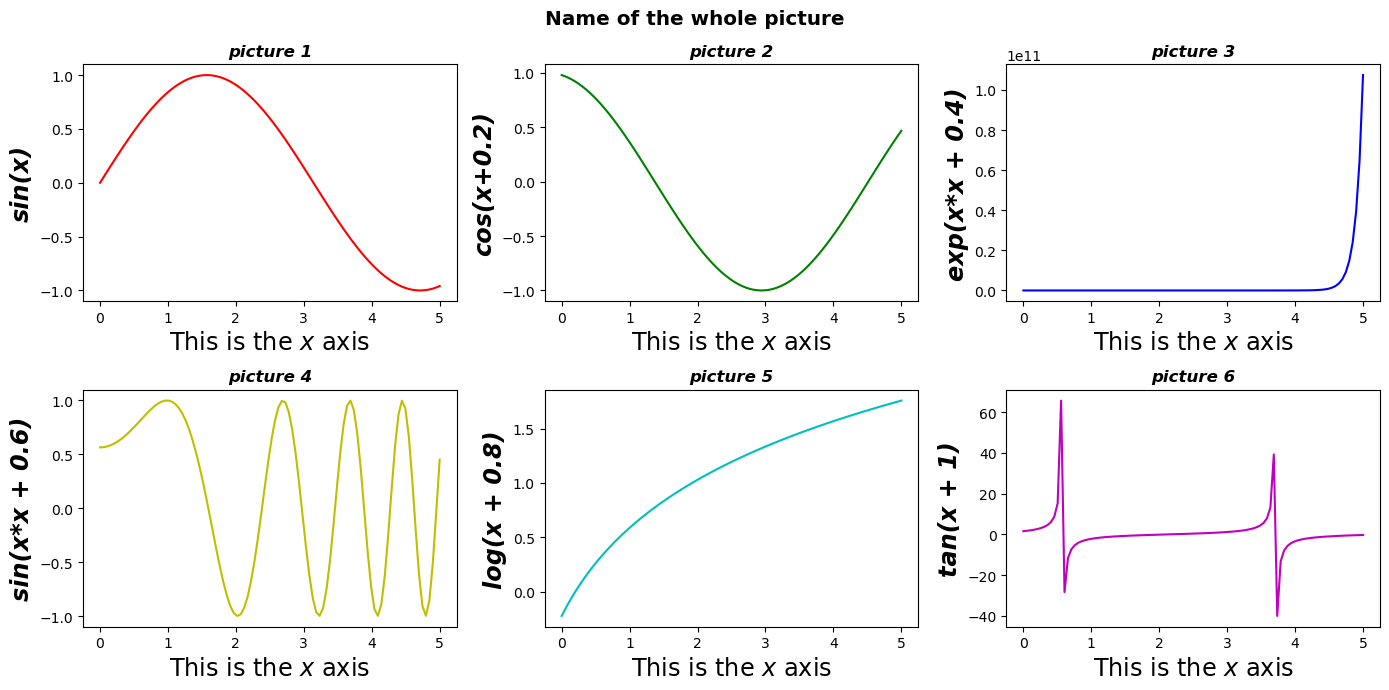

In [16]:
# I just copied the solution hueheuehuehue
x = np.linspace(0,5,100)
y1 = np.sin(x)
y2 = np.cos(x + 0.2)
y3 = np.exp(x*x + 0.4)
y4 = np.sin(x*x + 0.6)
y5 = np.log(x + 0.8)
y6 = np.tan(x + 1)

# now we decide the actual figure size in inches
fig = plt.figure(figsize=(14,7))

plt.suptitle('Name of the whole picture',fontweight='bold', fontsize='x-large')
plt.subplots_adjust(hspace=0.3, top=0.8) 
# create subplots 231 means make a 2x3 grid and this is the first plot
plt.subplot(231)
#these are here to show that you can do the same here as for a single plot
plt.title('picture 1',fontsize = 'large',fontstyle='italic',fontweight='bold')
plt.ylabel('sin(x)',fontsize = 'xx-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('This is the $x$ axis',fontsize = 'xx-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y1,color='r')

plt.subplot(232)
plt.title('picture 2',fontsize = 'large',fontstyle='italic',fontweight='bold')
plt.ylabel('cos(x+0.2)',fontsize = 'xx-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('This is the $x$ axis',fontsize = 'xx-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y2,color='g')

plt.subplot(233)
plt.title('picture 3',fontsize = 'large',fontstyle='italic',fontweight='bold')
plt.ylabel('exp(x*x + 0.4)',fontsize = 'xx-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('This is the $x$ axis',fontsize = 'xx-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y3,color='b')

plt.subplot(234)
plt.title('picture 4',fontsize = 'large',fontstyle='italic',fontweight='bold')
plt.ylabel('sin(x*x + 0.6)',fontsize = 'xx-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('This is the $x$ axis',fontsize = 'xx-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y4,color='y')

plt.subplot(235)
plt.title('picture 5',fontsize = 'large',fontstyle='italic',fontweight='bold')
plt.ylabel('log(x + 0.8)',fontsize = 'xx-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('This is the $x$ axis',fontsize = 'xx-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y5,color='c')

plt.subplot(236)
plt.title('picture 6',fontsize = 'large',fontstyle='italic',fontweight='bold')
plt.ylabel('tan(x + 1)',fontsize = 'xx-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('This is the $x$ axis',fontsize = 'xx-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y6,color='m')
# removed extra white space
plt.tight_layout()
#plt.show()

#### **Exercise 4:**
Plot the recaman sequence in the following way:

Add a semi-circular arc from $a_{n}$ to $a_{n-1}$.

Alternate the arcs to be above and below the x-axis according to whether
    n is even or odd.

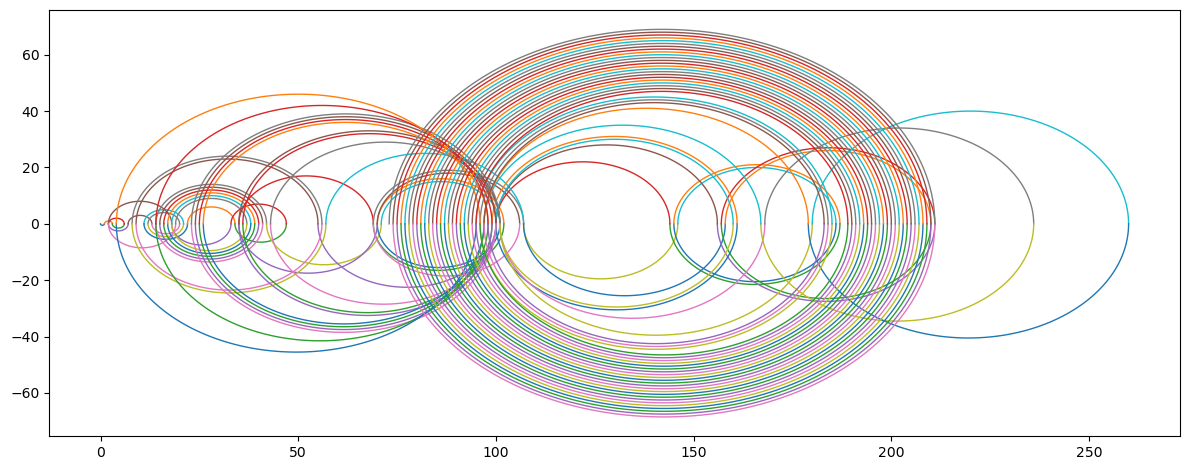

In [10]:
def Recaman(N):
    a = [0]
    b = {0}
    for n in range(1, N):
        if a[n-1] - n > 0 and (a[n-1] - n) not in b:
            a.append(a[n-1] - n)
            b.add(a[n-1] + n)
        else:
            a.append(a[n-1] + n)
            b.add(a[n-1] + n)
    return a

def semi_circle(center, theta, radius, n):
    x = center + radius * np.cos(theta)
    y =  radius * np.sin(theta)
    if n%2 == 0:
        return ax.plot(x,y,linestyle='-',linewidth=1)
    else:
        return ax.plot(x,-y,linestyle='-',linewidth=1)

#aspect ratio
w, h = plt.figaspect(0.4)
fig = plt.figure(figsize=(w,h))
ax = plt.axes()

N = 139
a = Recaman(N)

for n in range(1, N):
    center = (a[n-1]+a[n])/2 
    theta = np.linspace(0, np.pi, 100)
    radius = np.abs((a[n-1]-a[n])/2)
    semi_circle(center, theta, radius, n)

plt.tight_layout()

#### **Exercise5:**

Plot a rainbow. Use your imagination and google to make it beautiful.

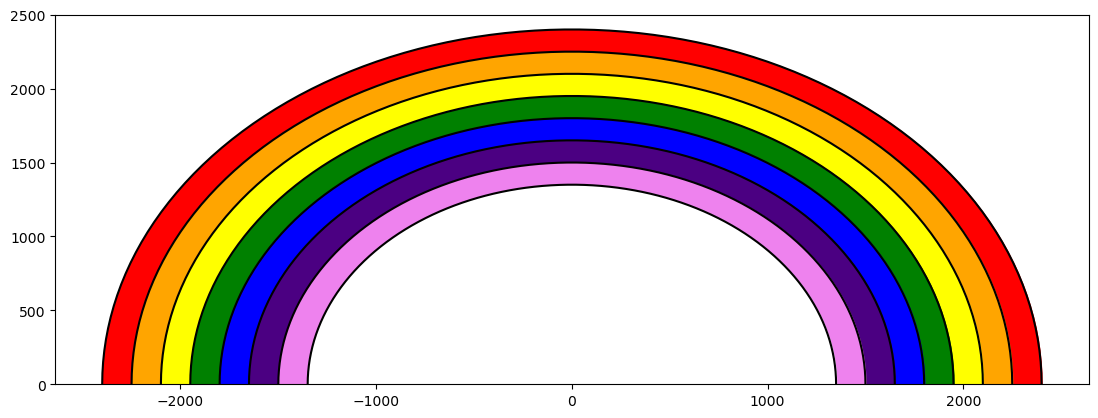

In [12]:
theta = np.linspace(0, np.pi, 100) 

w, h = plt.figaspect(0.36)
fig = plt.figure(figsize=(w,h))
ax = plt.axes()

#y_old = 2500*np.sin(theta)
for delta, color in zip([2400, 2250, 2100, 1950, 1800, 1650, 1500, 1350], ["r", "orange", "yellow" ,"g", "b", "indigo", "violet", "white"] ):
    y =  delta*np.sin(theta)
    x = delta*np.cos(theta)
    ax.plot(x, y, "-k")
    plt.fill_between(x, y, color=color)

plt.ylim(0, 2500)
plt.show()

#### **Exercise6**

Plot a nice-looking 3-D torus. Do this 3 times with different styles. 

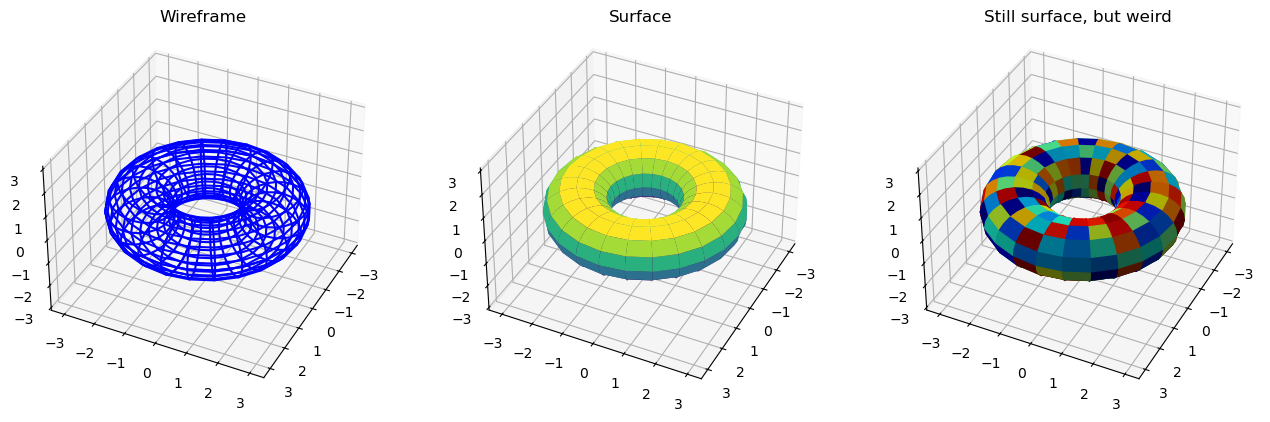

In [18]:
#I just copied the soln hueheuheu

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Function to generate 3D torus coordinates
def generate_torus(R, r, theta, phi):
    x = (R + r * np.cos(phi)) * np.cos(theta)
    y = (R + r * np.cos(phi)) * np.sin(theta)
    z = r * np.sin(phi)
    return x, y, z

# Torus parameters
n_plot_points=25
R = 2  # Major radius
r = 1  # Minor radius
theta = np.linspace(0, 2 * np.pi, n_plot_points)
phi = np.linspace(0, 2 * np.pi, n_plot_points)
theta, phi = np.meshgrid(theta, phi)

# Style 1: Wireframe
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(131, projection='3d')
x, y, z = generate_torus(R, r, theta, phi)
ax.set_zlim(-3,3)
ax.view_init(36, 26)
ax.plot_wireframe(x,y,z, color="#0000FF")

ax.set_title('Wireframe')

# Style 2: Surface
ax = fig.add_subplot(132, projection='3d')
x, y, z = generate_torus(R, r, theta, phi)
ax.set_zlim(-3,3)
ax.view_init(37, 26)
my_col = cm.jet(np.random.rand(z.shape[0],z.shape[1]))
# available colormaps are here -  https://matplotlib.org/stable/tutorials/colors/colormaps.html
ax.plot_surface(x,y,z,rstride=2,cstride=1,cmap='viridis')
ax.set_title('Surface')

# Style 3: used the same, but changed colormap
ax = fig.add_subplot(133, projection='3d')
x, y, z = generate_torus(R, r, theta, phi)
ax.set_zlim(-3,3)
ax.view_init(37, 26)
#example of how to contol colormaps with weird stuff
my_col = cm.jet(np.random.rand(z.shape[0],z.shape[1]))
ax.plot_surface(x,y,z,rstride=2,cstride=1,facecolors = my_col)
ax.set_title('Still surface, but weird')

plt.show()